In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and Inspect Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Inspect if there is any strage values across columns despite no null value detected (can be outlier or missing values represented by strings)

In [4]:
print(train.Gender.value_counts())
print(test.Gender.value_counts())

Gender
Female    10422
Male      10336
Name: count, dtype: int64
Gender
Female    6965
Male      6875
Name: count, dtype: int64


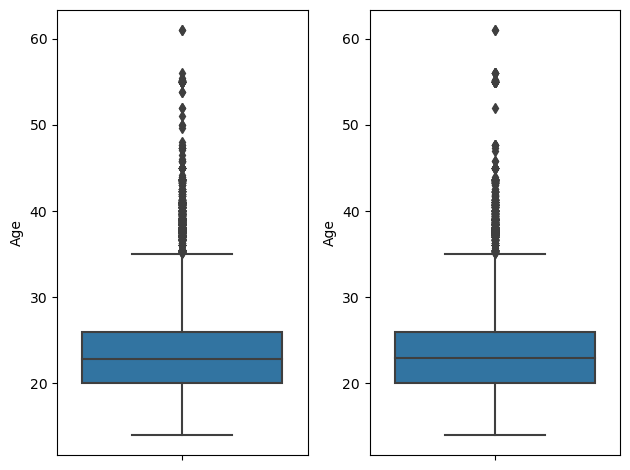

In [5]:
fig, ax = plt.subplots(1,2)

sns.boxplot(train, y='Age', ax=ax[0])
sns.boxplot(test, y='Age', ax=ax[1])

plt.tight_layout()

plt.show()

Outlier detected, we might want to return to it later

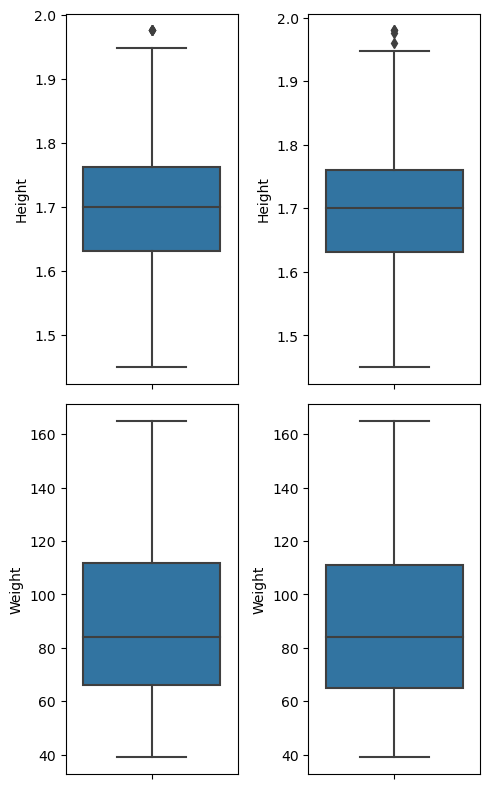

In [7]:
fig, ax = plt.subplots(2,2, figsize=(5,8))

sns.boxplot(train, y='Height', ax=ax[0][0])
sns.boxplot(test, y='Height', ax=ax[0][1])
sns.boxplot(train, y='Weight', ax=ax[1][0])
sns.boxplot(test, y='Weight', ax=ax[1][1])

plt.tight_layout()

plt.show()

In [8]:
print(train.family_history_with_overweight.value_counts())
print(test.family_history_with_overweight.value_counts())

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
family_history_with_overweight
yes    11384
no      2456
Name: count, dtype: int64


↑ potentially need to be stratified if we want to use KFold for example 

In [9]:
print(train.FAVC.value_counts())
print(test.FAVC.value_counts())

FAVC
yes    18982
no      1776
Name: count, dtype: int64
FAVC
yes    12583
no      1257
Name: count, dtype: int64


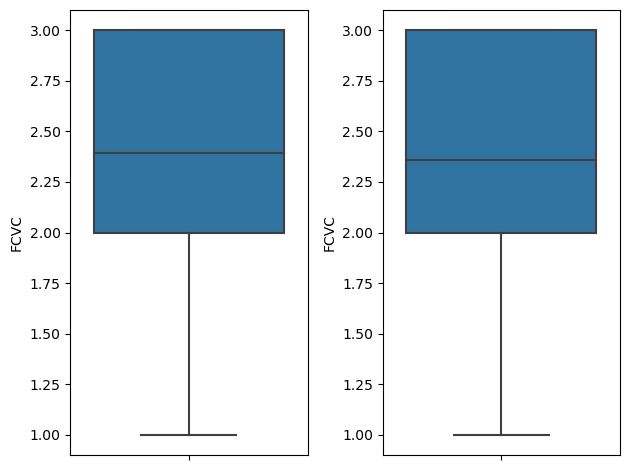

In [10]:
fig, ax = plt.subplots(1,2)

sns.boxplot(train, y='FCVC', ax=ax[0])
sns.boxplot(test, y='FCVC', ax=ax[1])

plt.tight_layout()

plt.show()

c:\Users\Zak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


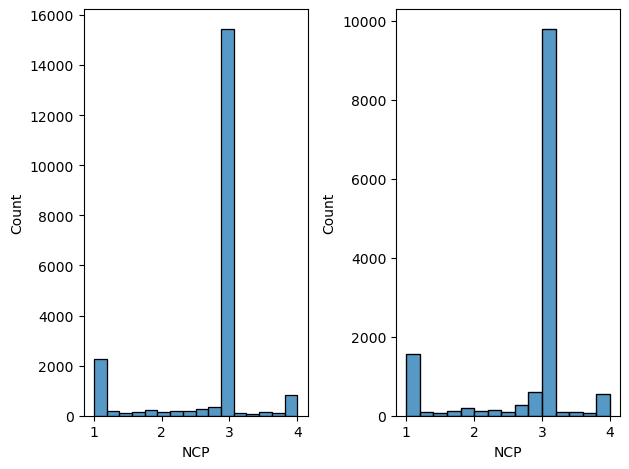

In [57]:
fig, ax = plt.subplots(1,2)

sns.histplot(train['NCP'], ax=ax[0])
sns.histplot(test['NCP'], ax=ax[1])

plt.tight_layout()

plt.show()

warning statement indicate inf values? ↑

In [12]:
print(np.any(np.isinf(train['NCP'])))
print(np.any(np.isinf(test['NCP'])))

# We good

False
False


In [13]:
print(train.CAEC.value_counts())
print(test.CAEC.value_counts())

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
CAEC
Sometimes     11689
Frequently     1617
Always          359
no              175
Name: count, dtype: int64


In [14]:
print(train.SMOKE.value_counts())
print(test.SMOKE.value_counts())

SMOKE
no     20513
yes      245
Name: count, dtype: int64
SMOKE
no     13660
yes      180
Name: count, dtype: int64


heavily imbalanced class alert ↑

Better to inspect categorical column this way below. So we could see which categorical column having many unique values to be inspected further

In [21]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

# Getting value counts for each categorical column
# for col in categorical_cols:
#     print(f"Value counts for {col}:")
#     print(train[col].value_counts())
#     print()  # Adding a blank line for better readability

train[categorical_cols].nunique()


Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [22]:
print(train.MTRANS.value_counts())
print(test.MTRANS.value_counts())

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64
MTRANS
Public_Transportation    11111
Automobile                2405
Walking                    280
Bike                        25
Motorbike                   19
Name: count, dtype: int64


In [26]:
print(train.NObeyesdad.value_counts())
# print(test.NObeyesdad.value_counts())

# No Nobeyesdad column in the test dataframe (since it is the target)

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


### Taking the Outliers Down

Using the traditional Interquartile Range

In [52]:
def count_outlier_iqr(df):
    numerical_columns = df.select_dtypes(include=['int64','float64'])

    outlier_counter = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in numerical_columns:
        lower_quantile = df[col].quantile(0.25)
        upper_quantile = df[col].quantile(0.75)
        interquartile = upper_quantile - lower_quantile
        
        upper_outlier = upper_quantile + 1.5 * interquartile
        lower_outlier = lower_quantile - 1.5 * interquartile

        count_outlier = len(df[(df[col] > upper_outlier) | (df[col] < lower_outlier)])

        new_row = {'Col': col, 'Count': count_outlier, 'Percent': count_outlier / len(df[col])}
        outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)

    outlier_counter['Percent'] = outlier_counter['Percent'].map(lambda x: '{:.2%}'.format(x))
    
    return outlier_counter

In [55]:
count_outlier_iqr(train)

C:\Users\Zak\AppData\Local\Temp\ipykernel_7676\1016322408.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)


,Col,Count,Percent
0,id,0,0.00%
1,Age,1074,5.17%
2,Height,4,0.02%
3,Weight,0,0.00%
4,FCVC,0,0.00%
5,NCP,6052,29.16%
6,CH2O,0,0.00%
7,FAF,0,0.00%
8,TUE,0,0.00%


Example of Using LocalOutlierFactor

In [27]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Example data
X = np.array([[1, 2], [2, 3], [3, 4], [8, 8], [7, 7], [1, 1]])

# Instantiate the model with the number of neighbors set to 2
clf = LocalOutlierFactor(n_neighbors=2)

# Fit and predict on the data (unfit method as this is unsupervised)
outliers = clf.fit_predict(X)

# Outliers are marked with -1
print(outliers)

print(np.count_nonzero(outliers == -1))


[ 1  1  1 -1 -1  1]


In [32]:
def lof_outlier(df):
    

2

Work a bit with NPC

In [61]:
print(train['NCP'].max())
print(train['NCP'].min())
print()
print(test['NCP'].max())
print(test['NCP'].min())

4.0
1.0

4.0
1.0


How about round them all?

In [ ]:
# train['NCP'] = train['NCP'].round()
# test['NCP'] = test['NCP'].round()

### Proper EDA
Investigating the feature in explaining the target in visualization

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Since target has multiple (somehow too many) unique values, we will try to slightly condense it

In [68]:
def nobeyes_edit(x):
    if x in ('Overweight_Level_I','Overweight_Level_II'):
        return 'Overweight'
    elif x in ('Obesity_Type_I','Obesity_Type_II',"Obesity_Type_III"):
        return 'Obesity'
    else:
        return x


train['NObeyesdad_short'] = train['NObeyesdad'].apply(nobeyes_edit)

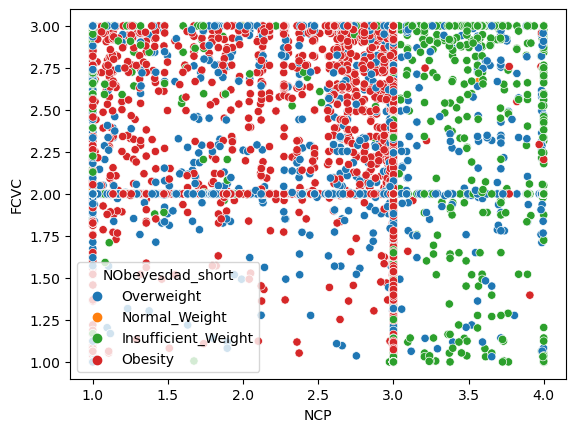

In [70]:
sns.scatterplot(data=train, x='NCP', y='FCVC', hue='NObeyesdad_short')
plt.show()

Note: greater NCP (more than 3) usually associated with insufficient weight and it only

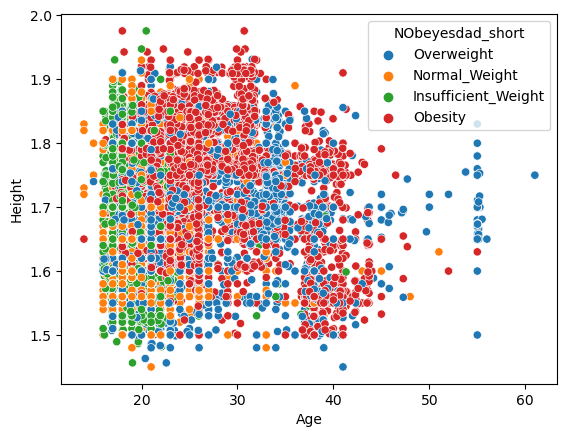

In [77]:
sns.scatterplot(data=train, x='Age', y='Height', hue='NObeyesdad_short')
plt.show()

The insufficient weight group are commonly amongst youngster.

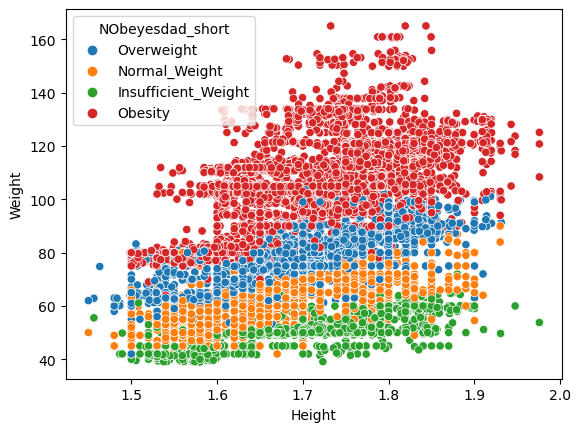

In [79]:
sns.scatterplot(data=train, x='Height', y='Weight', hue='NObeyesdad_short')
plt.show()

In [80]:
sns.catplot(data=train, x='family_')

array(['yes', 'no'], dtype=object)